# Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

The **CO2 EMISSIONS (g/km)** column is the dependent column, and the rest are the independent columns.

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
print(f'The shape of the data frame : {df.shape}')

The shape of the data frame : (1067, 13)


In [4]:
df.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [5]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df = df[
    ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
     'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']
]

df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


# Exercise 1 : Histogram

Plot a Histogram for the following columns :-

1. CO2EMISSIONS
2. CYLINDERS
3. ENGINESIZE
4. FUELCONSUMPTION_COMB
5. FUELCONSUMPTION_CITY
6. FUELCONSUMPTION_HWY
7. FUELCONSUMPTION_COMB_MPG

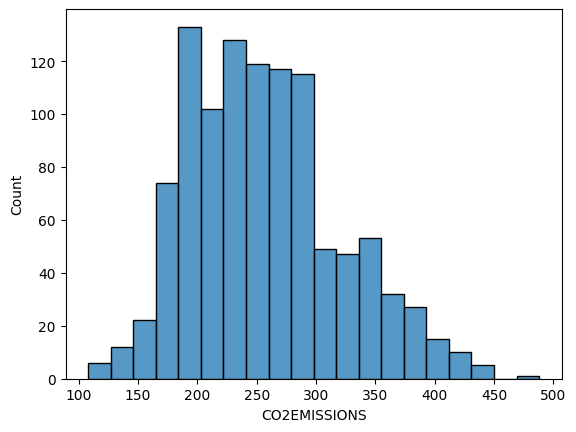

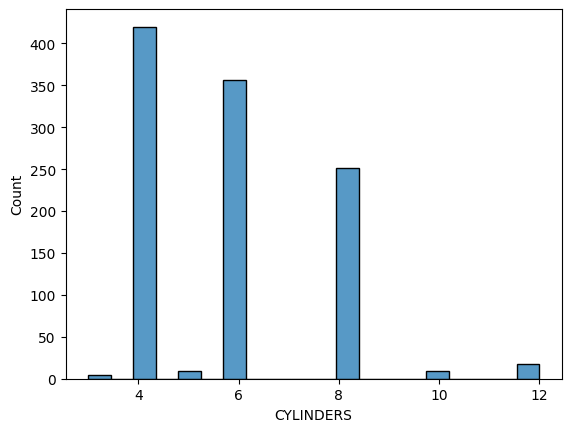

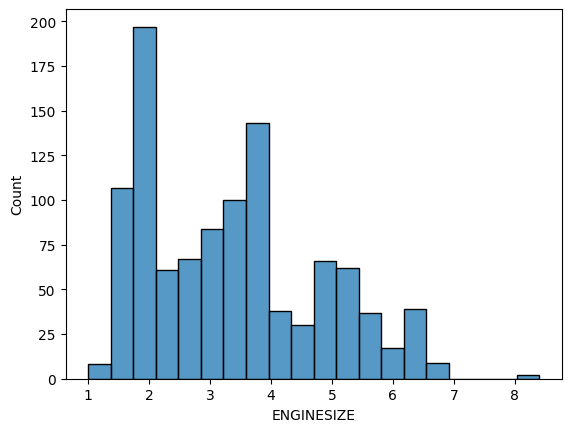

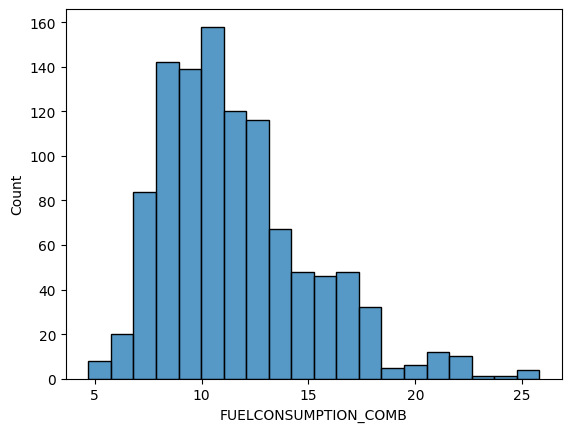

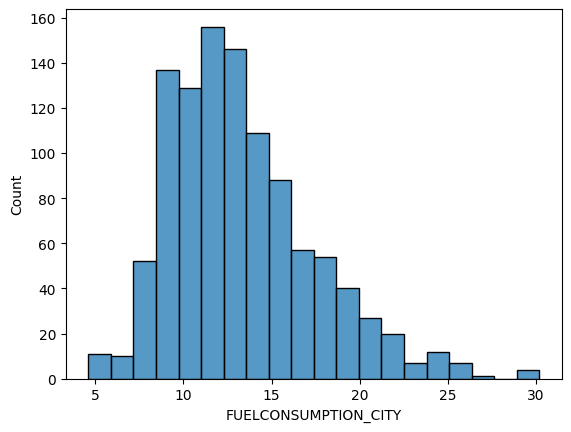

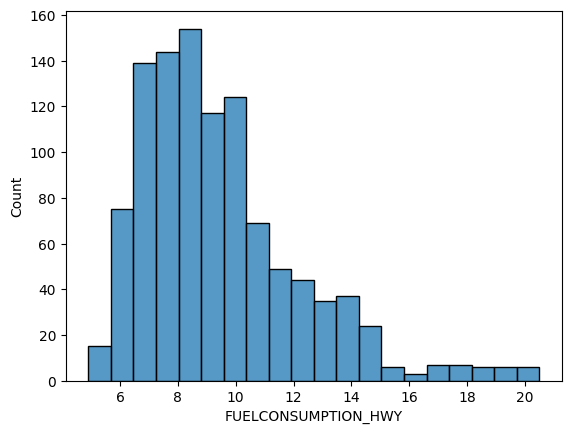

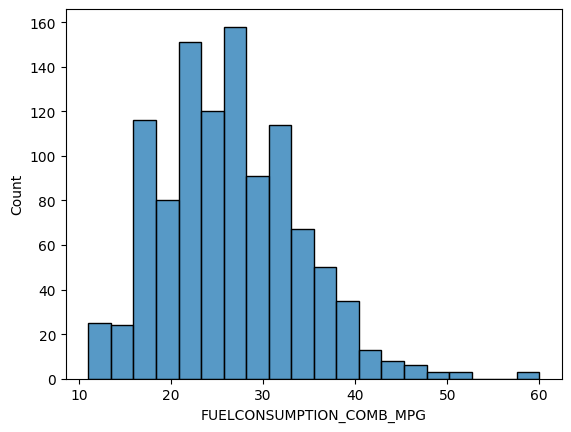

In [8]:
sns.histplot(df, x='CO2EMISSIONS', bins=20)
plt.show()
sns.histplot(df, x='CYLINDERS', bins=20)
plt.show()
sns.histplot(df, x='ENGINESIZE', bins=20)
plt.show()
sns.histplot(df, x='FUELCONSUMPTION_COMB', bins=20)
plt.show()
sns.histplot(df, x='FUELCONSUMPTION_CITY', bins=20)
plt.show()
sns.histplot(df, x='FUELCONSUMPTION_HWY', bins=20)
plt.show()
sns.histplot(df, x='FUELCONSUMPTION_COMB_MPG', bins=20)
plt.show()


# Exercise 2 : Scatter Plots

Plot 7 scatter plots, the 7 X features with CO2EMISSIONS.

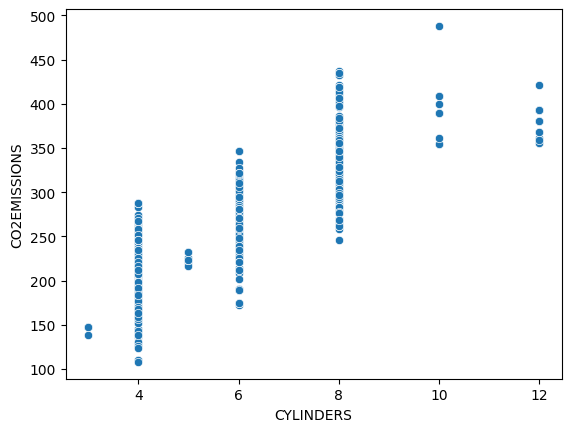

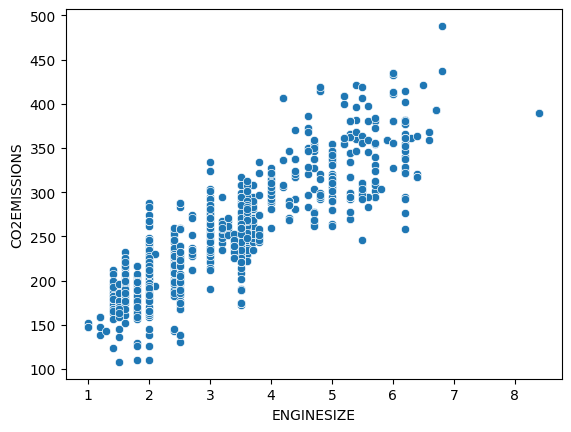

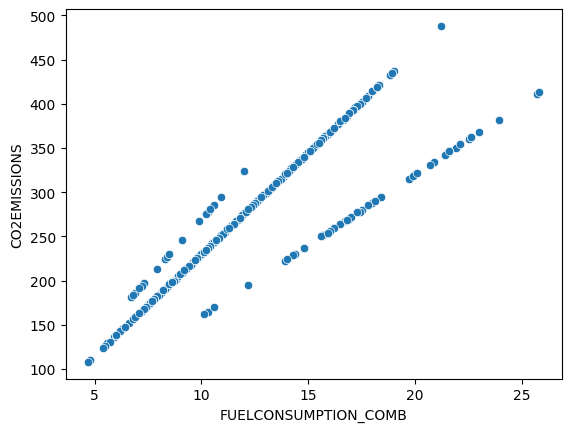

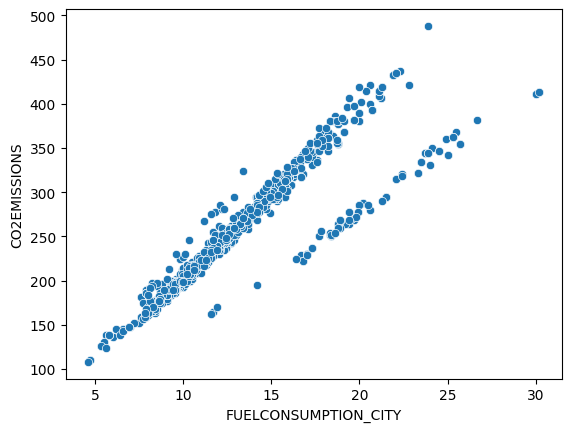

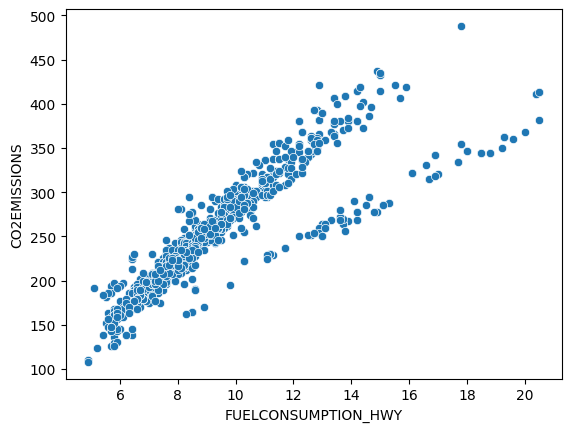

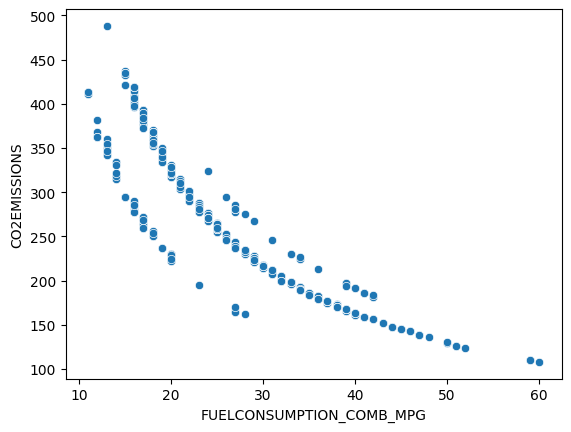

In [9]:
sns.scatterplot(data=df, x="CYLINDERS",y="CO2EMISSIONS")
plt.show()
sns.scatterplot(data=df, x="ENGINESIZE",y="CO2EMISSIONS")
plt.show()
sns.scatterplot(data=df, x="FUELCONSUMPTION_COMB",y="CO2EMISSIONS")
plt.show()
sns.scatterplot(data=df, x="FUELCONSUMPTION_CITY",y="CO2EMISSIONS")
plt.show()
sns.scatterplot(data=df, x="FUELCONSUMPTION_HWY",y="CO2EMISSIONS")
plt.show()
sns.scatterplot(data=df, x="FUELCONSUMPTION_COMB_MPG",y="CO2EMISSIONS")
plt.show()

# Exercise 3 : Box Plots

Plot 6 box plots for :-
1. CYLINDERS
2. ENGINESIZE
3. FUELCONSUMPTION_COMB
4. FUELCONSUMPTION_CITY
5. FUELCONSUMPTION_HWY
6. FUELCONSUMPTION_COMB_MPG

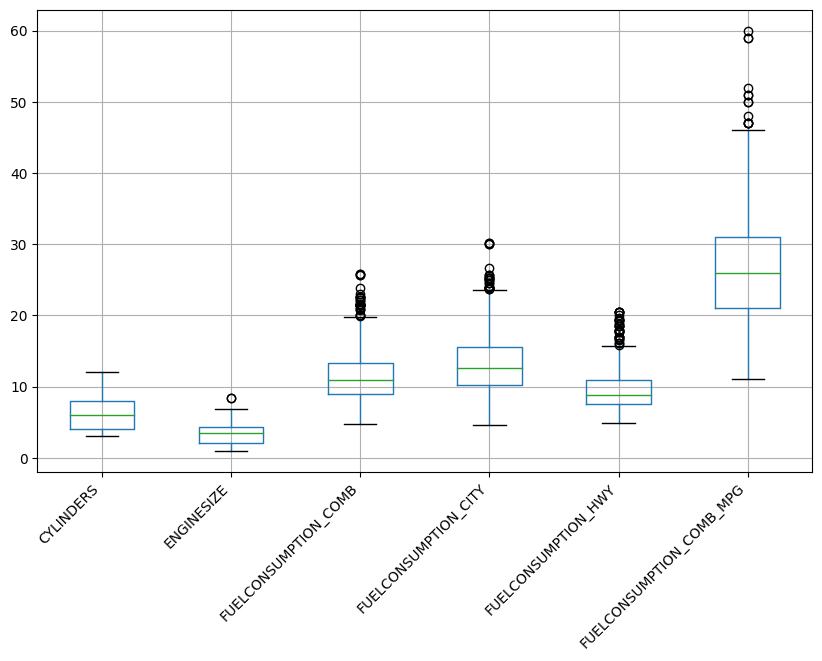

In [12]:
plt.figure(figsize=(10, 6))

df.boxplot(column=['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY'
                  ,'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB_MPG'])
plt.xticks(rotation=45, ha="right")
plt.show()

# Exercise 4 : Remove Outliers

Then plot a box plot to check if the outliers was removed or not.

In [13]:
Q1 = df['ENGINESIZE'].quantile(0.25)
Q3 = df['ENGINESIZE'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit = np.array(lower_limit)
upper_limit = np.array(upper_limit)
new_df = df[df['ENGINESIZE'].between(lower_limit, upper_limit)]

In [14]:
Q1 = df['FUELCONSUMPTION_COMB'].quantile(0.25)
Q3 = df['FUELCONSUMPTION_COMB'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit = np.array(lower_limit)
upper_limit = np.array(upper_limit)
new_df = df[df['FUELCONSUMPTION_COMB'].between(lower_limit, upper_limit)]

In [15]:
Q1 = df['FUELCONSUMPTION_CITY'].quantile(0.25)
Q3 = df['FUELCONSUMPTION_CITY'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit = np.array(lower_limit)
upper_limit = np.array(upper_limit)
new_df = df[df['FUELCONSUMPTION_CITY'].between(lower_limit, upper_limit)]

In [16]:
Q1 = df['FUELCONSUMPTION_HWY'].quantile(0.25)
Q3 = df['FUELCONSUMPTION_HWY'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit = np.array(lower_limit)
upper_limit = np.array(upper_limit)
new_df = df[df['FUELCONSUMPTION_HWY'].between(lower_limit, upper_limit)]

In [17]:
Q1 = df['FUELCONSUMPTION_COMB_MPG'].quantile(0.25)
Q3 = df['FUELCONSUMPTION_COMB_MPG'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit = np.array(lower_limit)
upper_limit = np.array(upper_limit)
new_df = df[df['FUELCONSUMPTION_COMB_MPG'].between(lower_limit, upper_limit)]

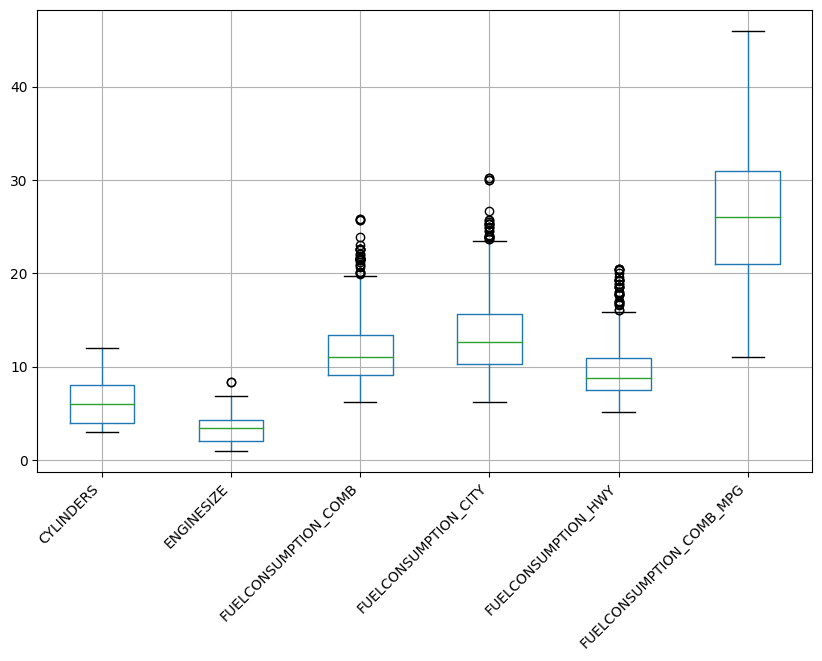

In [19]:
plt.figure(figsize=(10, 6))

new_df.boxplot(column=['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY'
                  ,'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB_MPG'])
plt.xticks(rotation=45, ha="right")
plt.show()

# Exercise 5 : Train and Test Split

Split the features in X variable and target in the Y variable.

Then use train_test_split method to split the dataset into train and test sets.

The test set have 20% of the dataset and the random state is 42.

In [21]:
x = new_df[['ENGINESIZE']]
y = new_df[['CO2EMISSIONS']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
print("x train is : ",x_train.shape)
print("x test is : ",x_test.shape)
print("y train is : ",y_train.shape)
print("y test is : ",y_test.shape)

x train is :  (843, 1)
x test is :  (211, 1)
y train is :  (843, 1)
y test is :  (211, 1)


# Exercise 4 : Simple Linear Regression.

Train a simple linear regression

X = Engine Size.
Y = Emission.

What is the coefficients and y intercept?

In [23]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train, y_train)

coefficients = linear_regression_model.coef_
y_intercept = linear_regression_model.intercept_
print('coefficients:', coefficients)
print('y_intercept:',  y_intercept)

coefficients: [[38.8652435]]
y_intercept: [127.62995122]


# Exercise 5 : Plot the Output

Plot linear regression model (output).

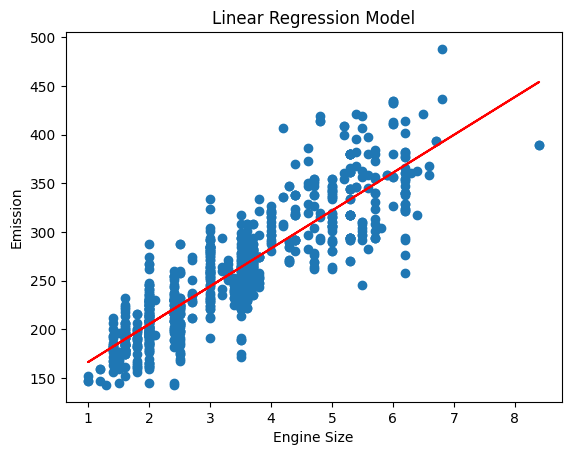

In [24]:
plt.scatter(x_train, y_train)
plt.plot(x_train, linear_regression_model.predict(x_train), color='red')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.title('Linear Regression Model')
plt.show()

# Exercise 6 : Evaluation

Evaluate the model using MSE, RMSE, MAE, and R^2.

In [25]:
y_pred = linear_regression_model.predict(x_test)

print(f'MSE  : {mean_squared_error(y_test, linear_regression_model.predict(x_test))}')
print(f'RMSE : {mean_squared_error(y_test, linear_regression_model.predict(x_test), squared=False)}')
print(f'MAE  : {mean_absolute_error(y_test, linear_regression_model.predict(x_test))}')
print(f'R^2  : {r2_score(y_test, linear_regression_model.predict(x_test))}')


MSE  : 829.3174865672577
RMSE : 28.797872952134114
MAE  : 21.811433049361796
R^2  : 0.7539531232311887


# Exercise 7 : Repeat 4, 5, and 6

Repeat the steps 4, 5, and 6.

For the rest features (CYLINDERS, FUELCONSUMPTION_COMB, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY) and then sort the models based on the best performance.

Note : Do not train the FUELCONSUMPTION_COMB_MPG.

In [26]:
x = new_df[['CYLINDERS']]
y = new_df[['CO2EMISSIONS']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [27]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train, y_train)

coefficients = linear_regression_model.coef_
y_intercept = linear_regression_model.intercept_
print('coefficients:', coefficients)
print('y_intercept:',  y_intercept)

coefficients: [[30.27040795]]
y_intercept: [82.95187983]


ValueError: x and y must be the same size

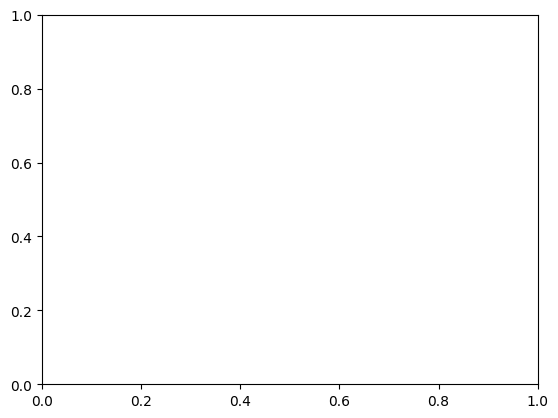

In [42]:
plt.scatter(x_train, y_train)
plt.plot(x_train, linear_regression_model.predict(x_train), color='red')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.title('Linear Regression Model')
plt.show()

In [29]:
y_pred = linear_regression_model.predict(x_test)

print(f'MSE  : {mean_squared_error(y_test, linear_regression_model.predict(x_test))}')
print(f'RMSE : {mean_squared_error(y_test, linear_regression_model.predict(x_test), squared=False)}')
print(f'MAE  : {mean_absolute_error(y_test, linear_regression_model.predict(x_test))}')
print(f'R^2  : {r2_score(y_test, linear_regression_model.predict(x_test))}')

MSE  : 1042.7907534517165
RMSE : 32.29227080048284
MAE  : 25.883698829415003
R^2  : 0.6906185964168956


In [30]:
x = new_df[['FUELCONSUMPTION_COMB']]
y = new_df[['CO2EMISSIONS']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [31]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train, y_train)

coefficients = linear_regression_model.coef_
y_intercept = linear_regression_model.intercept_
print('coefficients:', coefficients)
print('y_intercept:',  y_intercept)

coefficients: [[16.22789638]]
y_intercept: [69.06936427]


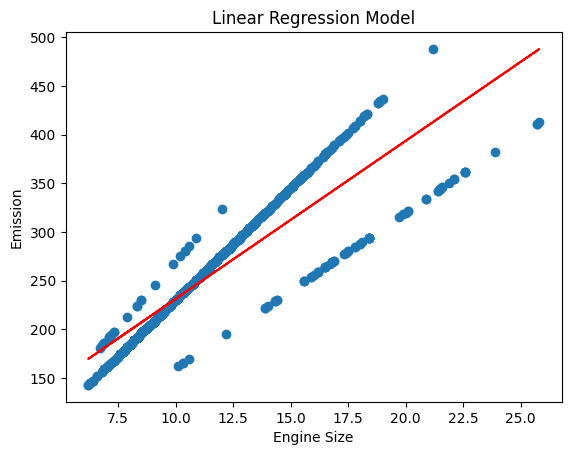

In [32]:
plt.scatter(x_train, y_train)
plt.plot(x_train, linear_regression_model.predict(x_train), color='red')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.title('Linear Regression Model')
plt.show()

In [33]:
y_pred = linear_regression_model.predict(x_test)

print(f'MSE  : {mean_squared_error(y_test, linear_regression_model.predict(x_test))}')
print(f'RMSE : {mean_squared_error(y_test, linear_regression_model.predict(x_test), squared=False)}')
print(f'MAE  : {mean_absolute_error(y_test, linear_regression_model.predict(x_test))}')
print(f'R^2  : {r2_score(y_test, linear_regression_model.predict(x_test))}')

MSE  : 771.4605386951063
RMSE : 27.775178463785004
MAE  : 18.920916175548776
R^2  : 0.7711184688966262


In [34]:
x = new_df[['FUELCONSUMPTION_CITY']]
y = new_df[['CO2EMISSIONS']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [35]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train, y_train)

coefficients = linear_regression_model.coef_
y_intercept = linear_regression_model.intercept_
print('coefficients:', coefficients)
print('y_intercept:',  y_intercept)

coefficients: [[13.94021625]]
y_intercept: [71.59855374]


In [ ]:
plt.scatter(x_train, y_train)
plt.plot(x_train, linear_regression_model.predict(x_train), color='red')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.title('Linear Regression Model')
plt.show()

In [36]:
y_pred = linear_regression_model.predict(x_test)

print(f'MSE  : {mean_squared_error(y_test, linear_regression_model.predict(x_test))}')
print(f'RMSE : {mean_squared_error(y_test, linear_regression_model.predict(x_test), squared=False)}')
print(f'MAE  : {mean_absolute_error(y_test, linear_regression_model.predict(x_test))}')
print(f'R^2  : {r2_score(y_test, linear_regression_model.predict(x_test))}')

MSE  : 706.1758721571433
RMSE : 26.573969823064512
MAE  : 17.535341682315774
R^2  : 0.7904875146031721


In [37]:
x = new_df[['FUELCONSUMPTION_HWY']]
y = new_df[['CO2EMISSIONS']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [38]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train, y_train)

coefficients = linear_regression_model.coef_
y_intercept = linear_regression_model.intercept_
print('coefficients:', coefficients)
print('y_intercept:',  y_intercept)

coefficients: [[19.46760473]]
y_intercept: [72.70710537]


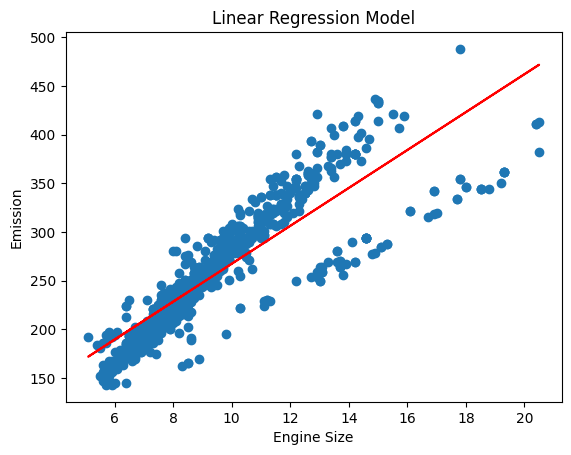

In [39]:
plt.scatter(x_train, y_train)
plt.plot(x_train, linear_regression_model.predict(x_train), color='red')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.title('Linear Regression Model')
plt.show()

In [40]:
y_pred = linear_regression_model.predict(x_test)

print(f'MSE  : {mean_squared_error(y_test, linear_regression_model.predict(x_test))}')
print(f'RMSE : {mean_squared_error(y_test, linear_regression_model.predict(x_test), squared=False)}')
print(f'MAE  : {mean_absolute_error(y_test, linear_regression_model.predict(x_test))}')
print(f'R^2  : {r2_score(y_test, linear_regression_model.predict(x_test))}')

MSE  : 1002.8772311040227
RMSE : 31.668236943411024
MAE  : 22.95373367862018
R^2  : 0.7024603791762849


# Exercise 8 : Multiple Linear Regression

Train one linear regression model with the following features :-

1. CYLINDERS
2. ENGINESIZE
3. FUELCONSUMPTION_COMB
4. FUELCONSUMPTION_CITY
5. FUELCONSUMPTION_HWY

Plot the output for each feature with the Y label.

In [41]:
x = new_df[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY',
            'FUELCONSUMPTION_HWY']]
y = new_df[['CO2EMISSIONS']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
coefficients=linear_regression_model.coef_
y_intercept=linear_regression_model.intercept_
print('coefficients:', coefficients)
print('y_intercept:', y_intercept)


coefficients: [[19.46760473]]
y_intercept: [72.70710537]
